# A5 Signal Representation
Finn Hittson - fxh157  
CSDS 464  
Due: May 1st, 2023

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import A5_fxh157 as a5
import numpy as np
import scipy
import time

## 1. Basis functions of the discrete Fourier transform

### 1a. Visualizing the Complex Representation of a Fourier Basis

<Figure size 640x500 with 0 Axes>

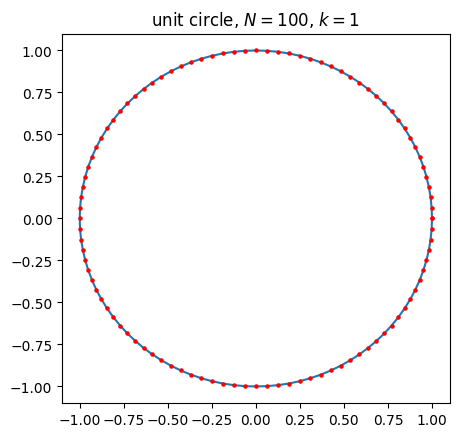

In [2]:
a5.plot_circle(k=1, N=100)

The plot above is a plot of $\exp(j\frac{2\pi k}{N}n)$. Eulers formula transforms this to
$$
\exp\left(j\frac{2\pi k}{N}n\right)=\cos\left(j\frac{2\pi k}{N}n\right)+\sin\left(j\frac{2\pi k}{N}n\right)
$$
Plotting the real part on the $x$-axis and the imaginary part on the $y$-axis yeilds the plot above.
$$
\text{x points}:=\left\{\text{Re}\left(\exp\left(j\frac{2\pi k}{N}n\right)\right):n=0,...,N-1\right\}=\left\{\cos\left(\frac{2\pi k}{N}n\right):n=0,...,N-1\right\}
$$
$$
\text{y points}:=\left\{\text{Im}\left(\exp\left(j\frac{2\pi k}{N}n\right)\right):n=0,...,N-1\right\}=\left\{\sin\left(\frac{2\pi k}{N}n\right):n=0,...,N-1\right\}
$$
Since cosine and sine are periodic and because the frequency component $\frac{2\pi k}{N}$ ranges from $0$ to $2\pi$. So, the cosine and sine functions will complete one revolution when plotted on the $x$ and $y$ axes; this results in the circle.

<Figure size 640x500 with 0 Axes>

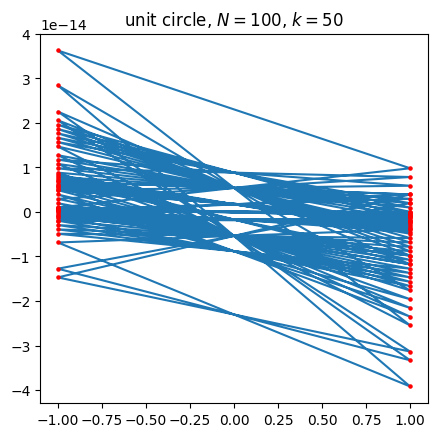

In [3]:
a5.plot_circle(k=50, N=100)

When $N=100$ and when $k=50$ the nyquist frequency is observed. With these values, the input to the cosine or sine function is now a multiple of $\pi$ so cosine will only return $\pm 1$ and sine will always return $0$. This plot demonstrates this by only plotting the points $(1,0)$ and $(-1,0)$. The values above are not exactly these two points, due to rounding errors, but are close enough to see the effect of the nyquist frequency. 

### 1b. Visualizing the basis functions

In [4]:
a5.w(n=1, k=1, N=100)

(0.9980267284282716+0.06279051952931337j)

<Figure size 640x500 with 0 Axes>

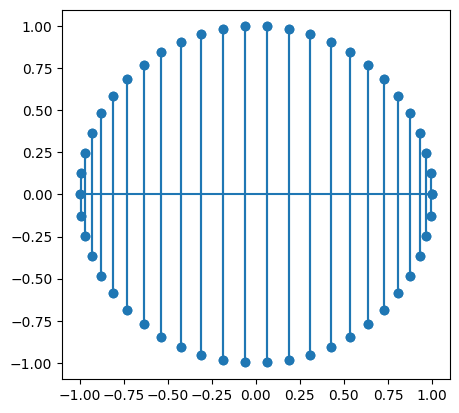

In [5]:
a5.plotw(k=2, N=100)

<Figure size 640x500 with 0 Axes>

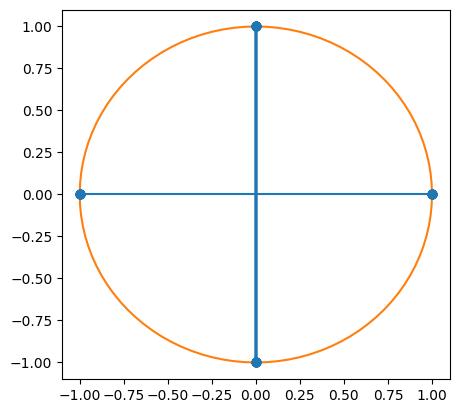

In [6]:
a5.plotw(k=25, N=100, show_cont=True)

### 1c. Orthogonality

In [7]:
N = 5
W = np.array([[a5.w(n=n, k=k, N=N) for n in range(N)] for k in range(N)])
print(abs(np.round(np.matrix(W).H.dot(W), 10)))

[[5. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 5. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 5.]]


For a set of vectors to be orthogonal, they need to be linearly independent with eachother. Thus all vector dot product combinations need to either equal $0$ if the vectors are different, or not zero if the vectors are the same. The matrix above is the result of the matrix transpose dot product with the original matrix. This evaluates all vector dot product combinations and it shows that only $5$ vectors are linearly independent so it forms an orthogonal basis. 

## 2. Fourier analysis in matrix-vector form

### 2a.  Constructing the basis matrix

In [8]:
N = 5
A = a5.fourier_matrix(N=N)
print(A)

[[ 1.        +0.j          1.        +0.j          1.        +0.j
   1.        +0.j          1.        +0.j        ]
 [ 1.        +0.j          0.30901699+0.95105652j -0.80901699+0.58778525j
  -0.80901699-0.58778525j  0.30901699-0.95105652j]
 [ 1.        +0.j         -0.80901699+0.58778525j  0.30901699-0.95105652j
   0.30901699+0.95105652j -0.80901699-0.58778525j]
 [ 1.        +0.j         -0.80901699-0.58778525j  0.30901699+0.95105652j
   0.30901699-0.95105652j -0.80901699+0.58778525j]
 [ 1.        +0.j          0.30901699-0.95105652j -0.80901699-0.58778525j
  -0.80901699+0.58778525j  0.30901699+0.95105652j]]


### 2b. Fourier matrix properties

In [9]:
I = np.eye(N)
print(np.round(np.linalg.norm(A.H.dot(A) - N*I), 14))

0.0


The result above demonstrates that $A^HA$ is identical to the identity times constant $N$ upto 14 digits of accuracy. It is evaluating the following equation:
$$
\lVert A^HA-N\cdot I \rVert \approx 0
$$

### 2c. Comparing to the standard `fft` function.

In [10]:
np.random.seed(N)
y = np.random.rand(N)
y_fft = scipy.fft.fft(y)
W = a5.fourier_matrix(N)
s = np.matrix(W).H.dot(y)
print(f"matrix fft: {y_fft}\n")
print(f"scipy fft: {s}")
print(f"difference: {np.round(np.linalg.norm(y_fft-s),14)}")

matrix fft: [ 2.70646673-0.j         -0.26841954+0.05483048j -0.5298309 -0.901772j
 -0.5298309 +0.901772j   -0.26841954-0.05483048j]

scipy fft: [[ 2.70646673+0.j         -0.26841954+0.05483048j -0.5298309 -0.901772j
  -0.5298309 +0.901772j   -0.26841954-0.05483048j]]
difference: 0.0


The result above demonstrates that the matrix fft produces the same result as scipy's fft with a side by side comparison and a numerical calculation by subtracting the difference between the two vectors and evaluating the norm of the resulting vector.

### 2d. Benchmarking

In [11]:
N = 1000
np.random.seed(N)
y = np.random.rand(N)

fft_start = time.time()
y_fft = scipy.fft.fft(y)
fft_end = time.time()

matrix_start = time.time()
W = a5.fourier_matrix(N)
s = W.H.dot(y)
matrix_end = time.time()

print(f"fft runtime: {fft_end - fft_start} seconds")
print(f"matrix runtime: {matrix_end - matrix_start} seconds")

fft runtime: 0.0 seconds
matrix runtime: 1.5365180969238281 seconds


### 2e. Synthesizing bandpass noise

## 3. Transforms in 2D

The 1D fourier transform can be expressed by the following summation:
$$
S_k[n]=\frac{1}{N}\sum_{n=0}^{N-1}y[n]\cdot\exp{\left(-j\frac{2\pi k}{N}n\right)}
$$
where the basis function is defined as
$$
w_k[n]=\exp{\left(-j\frac{2\pi k}{N}n\right)}
$$
Since this basis function represents one direction we can define a new basis function to represent two directions by multiplying two one dimensional basis functions together with different frequency components.
$$
w_{k,l}[n]=\exp{\left(-j\frac{2\pi k}{N}n\right)}\exp{\left(-j\frac{2\pi l}{N}n\right)}=\exp{\left(-j\frac{2\pi(k+l)}{N}n\right)}
$$
Then the summation needs to be modified to accept a second dimension. One summation sums over one direction so to accomodate for the other direction we need to make it a double summation. The second summation will range from $0$ to $M-1$ where $M$ is the second dimension length. For our purposes $M=N$ but this is for an arbitrary case, not just square images. The constant before the summations is then $\frac{1}{\sqrt{MN}}$ since it needs to scale equaly both dimensions. The summation is then:
$$
S_{k,l}[n]=\frac{1}{\sqrt{MN}}\sum_{m=0}^{M-1}\sum_{n=0}^{N-1}y[m,n]\exp{\left(-j\frac{2\pi(k+l)}{N}n\right)}
$$

norm difference: 136.6725908993


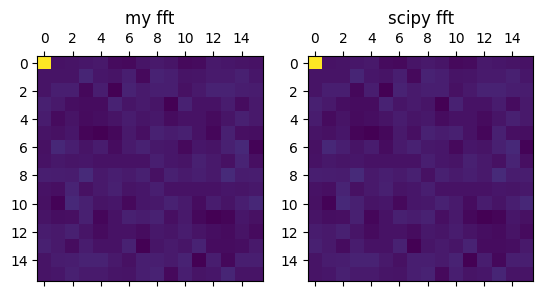

In [126]:
rand = np.random.rand(N, N)
rand_myfft = a5.fourier2d(y=rand)
rand_fft = scipy.fft.fft2(rand)
print(f"norm difference: {np.round(np.linalg.norm(rand_myfft-rand_fft), 10)}")
a5.plot_2dfourier(fft1=rand_myfft.real, fft2=rand_fft.real, title1="my fft", title2="scipy fft")

Through this implementation it is easy to see that this fourier transformed defined by the equation above performs similarly to the two dimensional fourier transformed offer by scipy. However, comparing the norm difference reveals that they are not exact. Because my method has a runtime complexity of $O(N^4)$, this leads to serious rounding errors that propagate throughout the entire calculation.